## SKLean库决策树使用
鸢尾花的种类判断属于连续型变量，使用二分的算法进行

导库

In [1]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

加载数据集

x表示特征，y表示标签 \
x中的向量表示 花萼长度，花萼宽度，花瓣长度，花瓣宽度 \
y中的向量表示 鸢尾花的种类


In [2]:
iris = load_iris()
X = iris.data
y = iris.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

创建决策树分类器

In [3]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)

训练模型

In [4]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

测试模型

In [5]:
accuracy = clf.score(X_test, y_test)
print(f"测试集准确率: {accuracy:.2f}")

测试集准确率: 1.00


规则可视化


决策树规则:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



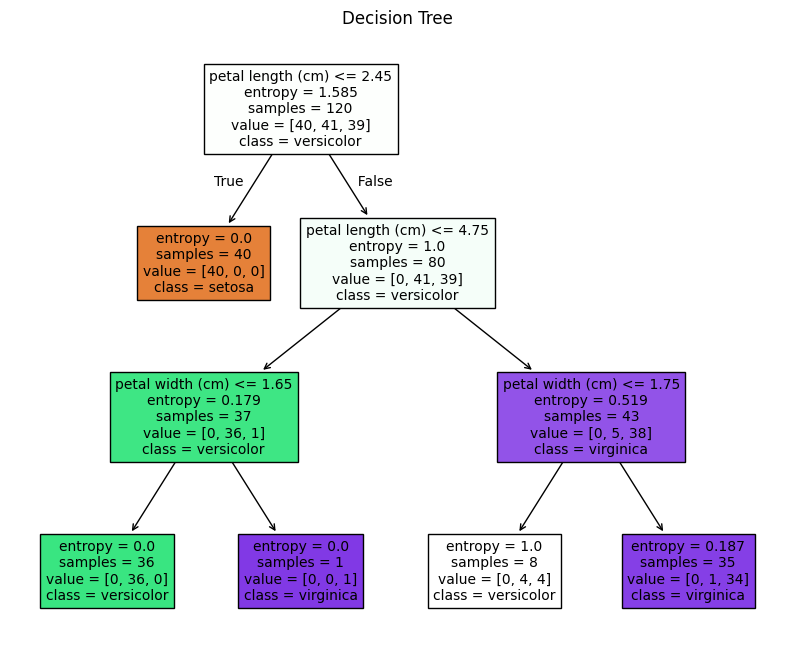

In [6]:
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("\n决策树规则:")
print(tree_rules)
# 可视化决策树
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree")
plt.show()


## 手动实现决策树

准备数据

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
x, y = iris.data, iris.target

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((120, 4), (30, 4))

调整参数

In [10]:
max_depth = 10


训练模型

构建树

信息熵计算函数

In [11]:
def entropy(y):
    m = len(y)
    # 使用公式计算熵
    return -sum((list(y).count(c) / m) * np.log2(list(y).count(c) / m) for c in set(y))

分割数据集

In [12]:
def split_dataset(X, y, feature_index, threshold):
    # 根据特征和阈值划分左右子集
    left_indices = [i for i in range(
        len(X)) if X[i, feature_index] <= threshold]
    right_indices = [i for i in range(
        len(X)) if X[i, feature_index] > threshold]
    return left_indices, right_indices

计算最佳分割特征

In [13]:
def best_split_id3(X, y):
    """
    选择最佳分割特征和阈值
    """
    # 初始化最佳信息增益
    best_info_gain = -1
    best_feature_index = None
    best_threshold = None
    # 计算当前信息熵
    current_entropy = entropy(y)
    # 遍历所有特征，即向量的所有列
    for feature_index in range(X.shape[1]):
        # 获取当前特征的所有可能取值
        # feature_index 就是 X 的列索引
        thresholds = set(X[:, feature_index])
        for threshold in thresholds:
            # 根据阈值分割数据集
            left_indices, right_indices = split_dataset(
                X, y, feature_index, threshold)
            if len(left_indices) == 0 or len(right_indices) == 0:
                # 如果分割后的数据集为空，则跳过
                # 因为无法计算信息增益 
                continue
            # 计算左右子集的信息熵
            left_entropy = entropy(y[left_indices])
            right_entropy = entropy(y[right_indices])
            # 计算信息增益
            # 这里使用 ID3 算法，信息增益 = 当前信息熵 - 条件熵
            # 因为len(indices) / len(X) 就相当于条件概率 P(Y|X)
            info_gain = current_entropy - \
                (len(left_indices) / len(X) * left_entropy +
                 len(right_indices) / len(X) * right_entropy)

            if info_gain > best_info_gain:
                # 更新最佳信息增益
                best_info_gain = info_gain
                best_feature_index = feature_index
                best_threshold = threshold
    return best_feature_index, best_threshold

In [14]:
def build_tree_id3(X, y, depth=0, max_depth=3):
    # 如果所有的标签都相同，则返回该标签
    if len(set(y)) == 1:
        return {'value': y[0]}
    # 如果达到最大深度，则返回最常见的标签
    if depth >= max_depth:
        return {'value': max(set(y), key=list(y).count)}
    # 选择最佳分割特征和阈值
    feature_index, threshold = best_split_id3(X, y)
    if feature_index is None:
        # 如果无法找到最佳分割，则返回最常见的标签
        return {'value': max(set(y), key=list(y).count)}
    # 分割数据集
    left_indices, right_indices = split_dataset(X, y, feature_index, threshold)
    # left_indices 是一个数组，里面存放的是 X 的行索引
    left_subtree = build_tree_id3(
        X[left_indices], y[left_indices], depth + 1, max_depth)
    right_subtree = build_tree_id3(
        X[right_indices], y[right_indices], depth + 1, max_depth)

    return {'feature_index': feature_index, 'threshold': threshold, 'left': left_subtree, 'right': right_subtree}

构建ID3决策树

In [15]:
id3_tree = build_tree_id3(X_train, y_train, max_depth=3)
id3_tree

{'feature_index': 2,
 'threshold': np.float64(1.9),
 'left': {'value': np.int64(0)},
 'right': {'feature_index': 2,
  'threshold': np.float64(4.7),
  'left': {'feature_index': 3,
   'threshold': np.float64(1.6),
   'left': {'value': np.int64(1)},
   'right': {'value': np.int64(2)}},
  'right': {'feature_index': 3,
   'threshold': np.float64(1.7),
   'left': {'value': np.int64(1)},
   'right': {'value': np.int64(2)}}}}

构建预测模型

In [16]:
def predict(tree, X):
    if 'value' in tree:
        return tree['value']

    if X[tree['feature_index']] <= tree['threshold']:
        return predict(tree['left'], X)
    else:
        return predict(tree['right'], X)

In [17]:
id3_predictions = [predict(id3_tree, x) for x in X_test]
print(id3_predictions)

[np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(0)]


In [18]:
id3_accuracy = sum(id3_predictions == y_test) / len(y_test)
print(f"ID3算法实现的决策树测试集准确率: {id3_accuracy:.2f}")

ID3算法实现的决策树测试集准确率: 1.00


## 构建离散型变量决策树